In [1]:
import numpy as np
import glob
import matplotlib.image as img


def loadDataset(path):  
    print('Loading Dataset...')
    train_x, train_y, test_x, test_y = [], [], [], []  
    for i in range(10):
        count = 0
        for filename in glob.glob(path + '\\trainsets_1\\ID5\\' + str(i)+'\\*.png'):    
            im=img.imread(filename)    
            train_x.append(im)         
            train_y.append(i)
            count += 1
            if count == 100:
                break
                
    for i in range(10):   
        count = 0
        for filename in glob.glob(path + '\\test_set\\' + str(i)+'\\*.png'):    
            im=img.imread(filename)     
            test_x.append(im)        
            test_y.append(i)  
            count += 1
            if count == 10 :
                break
    
    
    print('Dataset loaded...')  
                
    return np.array(train_x), np.array(train_y), np.array(test_x),np.array(test_y) 



In [2]:
trainX, trainY, testX, testY = loadDataset(r"C:\Users\Nauman\Documents\DL\Nauman_MSDS19041_03")

Loading Dataset...
Dataset loaded...


In [3]:
trainX.shape, testX.shape

((28, 28, 28), (30, 28, 28))

In [4]:
import scipy.io as sp
data = sp.loadmat('filters.mat')
filters = data['filters']
filters = np.array(filters)
print(filters.shape)

(17, 17, 36)


In [5]:
filters.shape[0]

17

In [6]:
def conv_single_step(img_patch, _filter):
    mul_ = img_patch * _filter
    return np.sum(mul_)
    

In [7]:
#Testing
image = np.array([[1,1,1],[0,1,1],[0,0,1]])
filt = np.array([[1,0,1],[0,1,0],[1,0,1]])
conv_single_step(image, filt)

4

In [8]:
def conv_forward(img, filters, stride=1, pad=0):
    heightOfImg = img.shape[0]
    widthOfImg = img.shape[1]
    no_of_filters = filters.shape[2]
    filter_wise_mat = list()
    
    for f in range(no_of_filters): 
        _filter = filters[:,:,f]
        heightOfImg_for_loop = int( (heightOfImg - _filter.shape[0]) + (2*pad) / stride) + 1 
        widthOfImg_for_loop =  int( (widthOfImg - _filter.shape[1]) + (2*pad) / stride) + 1 
        row_wise_Conv_Vals = list()
        
        for i_ht in range(heightOfImg_for_loop):
            width_wise_Conv_Vals  = list()
            
            for i_wth in range(widthOfImg_for_loop):
                patch_img = img[ i_ht : (i_ht + _filter.shape[0]), i_wth : (i_wth + _filter.shape[1]) ]
                width_wise_Conv_Vals.append(  conv_single_step(patch_img, _filter)  )
            
            row_wise_Conv_Vals.append(np.array(width_wise_Conv_Vals) )    

        filter_wise_mat.append( np.asarray(row_wise_Conv_Vals) )

    
    
    return np.array(filter_wise_mat)
    
    

In [9]:
def pool_forward(feature_map, mode="max", filter_size=2, stride=2):
    heightOfMap = feature_map.shape[1]
    widthOfMap = feature_map.shape[2]
    no_of_filters = feature_map.shape[0]
    
    filter_wise_mat = list()
    for f in range(no_of_filters): 
        heightOfMap_for_loop = int( (heightOfMap - filter_size) / stride) + 1 
        widthOfMap_for_loop =  int( (widthOfMap - filter_size)  / stride) + 1 
        row_wise_pool_Vals = list()
        
        for i_ht in range(0,heightOfMap,filter_size):
            width_wise_pool_Vals  = list()
            
            for i_wth in range(0,widthOfMap,filter_size):
                f_map = feature_map[f]
                patch = f_map[i_ht: (i_ht+filter_size), i_wth: (i_wth+filter_size) ]
                
                width_wise_pool_Vals.append(  np.max(patch)  )
            
            row_wise_pool_Vals.append(np.array(width_wise_pool_Vals) )    

        filter_wise_mat.append( np.asarray(row_wise_pool_Vals) )

    
    
    return np.array(filter_wise_mat)
    
    

In [10]:
def conv_pool(data, filters):
    x_new = list()
    for img in data:
        mat = conv_forward(img, filters, 1, 0)
        mx_pool = pool_forward(mat)
        x_new.append(mx_pool.reshape(-1,1))

        if len(x_new)%100 == 0:
            print(len(x_new),"computed")
    return x_new


In [11]:
mat= conv_forward(trainX[0],filters)

In [12]:
print(mat.shape)
print(mat[0][0])
print("a")
a = np.swapaxes(mat,0,-1)
print(np.swapaxes(a,0,1).shape)
print(a[:,:,0].transpose())

(36, 12, 12)
[ 0.08334903  0.08378193  0.07680831  0.05865619  0.03017109 -0.00062764
 -0.03051573 -0.0622537  -0.08805487 -0.10444406 -0.11064647 -0.10695068]
a
(12, 12, 36)
[[ 0.08334903  0.08378193  0.07680831  0.05865619  0.03017109 -0.00062764
  -0.03051573 -0.0622537  -0.08805487 -0.10444406 -0.11064647 -0.10695068]
 [ 0.08695071  0.08081982  0.06642016  0.04192186  0.00634779 -0.02953343
  -0.05977859 -0.08784501 -0.10766805 -0.1175732  -0.11863994 -0.11121192]
 [ 0.07615709  0.06187776  0.03993432  0.01150105 -0.02356269 -0.055963
  -0.07947533 -0.09740645 -0.10688521 -0.10843511 -0.10339657 -0.09140244]
 [ 0.05719711  0.03491728  0.0074535  -0.0217224  -0.04917391 -0.07143329
  -0.08386328 -0.08885115 -0.08680938 -0.07924677 -0.06632895 -0.04827225]
 [ 0.03655554  0.01061673 -0.0172738  -0.04246647 -0.05813554 -0.06804492
  -0.07056172 -0.06584429 -0.05604361 -0.04186994 -0.02322057 -0.00284402]
 [ 0.00800099 -0.01513176 -0.03696607 -0.05258878 -0.05602705 -0.05559253
  -0.053

In [13]:
mat[:,:,0]

array([[ 8.33490296e-02,  8.69507066e-02,  7.61570890e-02,
         5.71971136e-02,  3.65555427e-02,  8.00098992e-03,
        -2.59281347e-02, -4.94689227e-02, -5.38127856e-02,
        -3.56378273e-02,  1.77006767e-02,  1.13816839e-01],
       [ 2.33612888e-02,  1.75106497e-02,  1.10360581e-02,
         1.39831266e-02,  2.48445780e-02,  2.87419120e-02,
         1.66371109e-02,  1.36516863e-03,  2.72405589e-03,
         2.53080011e-02,  6.42359060e-02,  1.09843853e-01],
       [-8.81576871e-03, -6.75452056e-03, -5.03021730e-04,
         9.28410863e-03,  1.83994686e-02,  2.57236864e-02,
         3.36361549e-02,  4.06854956e-02,  4.64323036e-02,
         5.78330519e-02,  7.35032812e-02,  8.62250499e-02],
       [-6.93347145e-02, -6.64715370e-02, -5.60253191e-02,
        -3.66382993e-02, -8.20799257e-03,  2.83802897e-02,
         6.46721411e-02,  9.63792042e-02,  1.24297292e-01,
         1.42996985e-01,  1.51220165e-01,  1.50551202e-01],
       [-1.11980809e-01, -1.87336616e-01, -2.6219068

In [14]:
pool_forward(mat).shape

(36, 6, 6)

In [16]:
len(trainX)

28

In [327]:
import pickle
with open("new_trainX.pkl", 'wb') as obj:
    pickle.dump(trainX_new, obj)

In [328]:
with open("new_trainX.pkl", 'rb') as obj:
    new_trainX = pickle.load(obj)

In [329]:
len(new_trainX)

1000

In [17]:
trainX[0].shape

(28, 28)

In [18]:
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
class Layer(object):
    
    def __init__ (self, name, weights_dim, bias, input_X=None):
        self.name = name
        self.input = input_X
        self.z = None
        self.output_a = None
        
        self.weights = np.random.randn(weights_dim[0],weights_dim[1])
        self.bias = np.random.randn(bias)
        
    errors = list()
    accuaracies = list ()
    gradient = None
    
    def sigmoid(self, s):
        return  (1/(1 + np.exp(-s))) 
    
    
    def sigmoid_derivative(self, s):
        #derivative of sigmoid
        sig = self.sigmoid(s)
        return sig *(1-sig) 
    
    
    def softmax(self, z):
        max_V = np.max(z, axis=-1)
        z = z - max_V #epsilon value to avoid the exponential overflow / divide by  zero error
        e_xp = np.exp(z)
        sfm = ( e_xp / np.sum(e_xp, axis=-1, keepdims=True) )
        return sfm
    
    def relu(self, z):
        s = np.where(z>=0,z,0)
        return s
    
    
    def relu_derivative(self, z):
        #derivative of relu
        s = np.where(z>=0,1,0)
        return  s  # apply derivative of relu on s and return it's value
    
    
    def tanh(self, z):
        return (2*self.sigmoid(2*z)) - 1 
  
    
    def tanh_derivative(self, z):
        #derivative of tanh
        return 1 - self.tanh(z)**2  # apply derivative of tanh on s and return it's value
  
    
    def crossentropy(self, Y, Y_pred):
        epsilon = 0.000001
        errors_for_all_data = Y * np.log(Y_pred + epsilon)
        return (-1)*sum(errors_for_all_data) #error

    
    def act_foo (self, h, name="sigmoid"):
        if name == "sigmoid":
            return self.sigmoid(h)
        if name == "softmax":
            return self.softmax(h)
        if name == "relu":
            return self.relu(h)
        if name == "tanh":
            return self.tanh(h)
        
        
    def derv_act_foo (self, h, name="sigmoid"):
        if name == "sigmoid":
            return self.sigmoid_derivative(h)
        if name == "relu":
            return self.relu_derivative(h)
        if name == "tanh":
            return self.tanh_derivative(h)
       
    

In [20]:
def init_network (no_of_layers=2, input_dim=1296, neuron_per_layer=[100,50,10]):
    layers = list()
    input_layer = Layer ("input", (input_dim, neuron_per_layer[0]), neuron_per_layer[0] ) 
    layers.append(input_layer)
    
    for i in range(0, no_of_layers):
        if i+1 == no_of_layers:
            layer = Layer ("output" , (neuron_per_layer[i], neuron_per_layer[i+1]) , neuron_per_layer[i+1] ) 
            layers.append(layer)
        else:
            layer = Layer ("hidden "+str(i+1) , (neuron_per_layer[i], neuron_per_layer[i+1]) , neuron_per_layer[i+1] ) 
            layers.append(layer)

    return layers


In [21]:
def get_onehot_encodings(labels):
    y = labels
    unique = np.unique(y)
    new_Y = np.zeros((len(y),len(unique)), dtype=int)
    
    for ind, val in enumerate(unique):
        a = np.where(y==val)
        new_Y[a, ind] = 1
   
    return new_Y


In [111]:
def accuracy(net, testX, testY, list_act_foo):
        # predict the value of testX
        predictions =  list()
        for ind, data in enumerate(testX):
            ff_net = feed_forward(net, data.reshape(1,-1), list_act_foo)
            predictions.append(ff_net[-1].output_a)
        #predictions = predictions[0,:]
        count = 0
        for pred,org in zip(predictions,testY):
            ind = np.argmax(pred)
            prediction = np.zeros((1,10), dtype=int)
            prediction[0,ind] = 1
            if (prediction == org).all():
                count += 1        

        return "{:.2f}".format(count/len(testY) *100)  # return accuracy    


In [23]:
def feed_forward(net, data, list_act_foo):
    net[0].input = data
    
    for ind,layer in enumerate(net):
        z = np.dot(layer.input, layer.weights) + layer.bias
        #print("shape z", z.shape)
        layer.z = z
        a_output = layer.act_foo( z , list_act_foo[ind])
        #print("shape a", a_output.shape)
        layer.output_a = a_output
        
        if ind+1 <= len(net)-1:
            net[ind+1].input = a_output


    return net

    

In [24]:
def back_prop (net, X, Y, lr, list_act_foo):
    y_pred = net[-1].output_a
    if np.isnan(y_pred).any():
        y_pred = np.nan_to_num(y_pred, neginf=0, posinf=0.1)
        print(np.isnan(y_pred).any())

    
    #print("predicted:",y_pred.shape)
    #print("original:",Y.shape)
    cost = net[-1].crossentropy(Y,y_pred)
    error =  np.sum(cost)   

    
    #print("error :", error)
    derv_sig = y_pred - Y
    #print(derv_sig)
    #derv_z = net[-1].sigmoid_derivative(y_pred)
    outputL_gradient = derv_sig   #element wise multiplication
    net[-1].gradient = outputL_gradient
    derv_Ws_el = np.dot(net[-1].input.T, outputL_gradient )
    derv_b_el =   np.sum(outputL_gradient)
    
    #print("weights before last layer", net[-1].weights)
    ws = net[-1].weights - (lr * derv_Ws_el)
    b = net[-1].bias -  (lr *  derv_b_el )
    net[-1].weights = ws
    net[-1].bias = b
    #print("\nweights After (last layer)", net[-1].weights)
    
    no_layers = range(len(net) - 1)
    for i in reversed(no_layers):
        error_hdn_L  = np.dot(net[i+1].gradient, net[i+1].weights.T)
        derv_z_a = net[i].derv_act_foo(net[i].z, list_act_foo[i])
        hdn_grad = error_hdn_L * derv_z_a
        net[i].gradient = hdn_grad
        
        derv_hdn_Ws = np.dot(net[i].input.T, hdn_grad)
        derv_hdn_b = np.sum(hdn_grad)
        #updating
        #print("\nweights before in hdn layer", net[i].weights)
        net[i].weights = net[i].weights -  (lr * derv_hdn_Ws) 
        net[i].bias = net[i].bias -  (lr * derv_hdn_b) 
        #print("\nweights after in hdn layer", net[i].weights)
        
        
    return net,error
        
        
    


In [25]:
def train_sgd (net, train_set_x, train_set_y, test_set_x, test_set_y, learning_rate, act_foo,batch_size, training_epochs):
    train_acc = list()
    test_acc = list()
    for epoch in range(1, training_epochs+1):
        errors = list()

        for ind, data in enumerate(train_set_x):
            net = feed_forward(net, data.reshape(1,-1), act_foo)
            net, error = back_prop(net, data.reshape(1,-1), train_set_y[ind], learning_rate,  act_foo)
            errors.append(error)
            
        train_acc.append(accuracy(net, train_set_x, encoded_train_y, act_foo) )
        test_acc.append(accuracy(net, test_set_x, encoded_test_y, act_foo) )
        
        print("Avg Error in",epoch,"epoch: {:.6f}".format(sum(errors)/len(errors)) )
    
    plt.title("Accuracy curves w.r.t Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.yticks(list(range(0,101,10)) )
    plt.plot(test_acc)
    plt.plot(train_acc)
    
    #plt.xticks(list(range(1,training_epochs)) )
    plt.legend({"test","train"})

        
    return net



3

In [26]:
encoded_train_y = get_onehot_encodings(trainY)
encoded_test_y = get_onehot_encodings(testY)
encoded_train_y.shape, encoded_test_y.shape

((28, 10), (30, 10))

In [27]:
trainX_new = conv_pool(trainX, filters)

In [28]:
new_test_X = conv_pool(testX, filters)

In [29]:
len(trainX_new)

28

In [30]:
trainX_new[0].shape

(1296, 1)

In [83]:
new_test_X[0].shape

(1296, 1)

In [120]:
act_foo = ["sigmoid","tanh","softmax"]
net = init_network(2, 1296, [100,50,10])
len(net)


3

Avg Error in 1 epoch: 8.973098
Avg Error in 2 epoch: 8.627089
Avg Error in 3 epoch: 8.282202
Avg Error in 4 epoch: 7.932916
Avg Error in 5 epoch: 7.559876
Avg Error in 6 epoch: 7.149935
Avg Error in 7 epoch: 6.725268
Avg Error in 8 epoch: 6.312902
Avg Error in 9 epoch: 5.932341
Avg Error in 10 epoch: 5.591035
Avg Error in 11 epoch: 5.288375
Avg Error in 12 epoch: 5.018283
Avg Error in 13 epoch: 4.772199
Avg Error in 14 epoch: 4.543435
Avg Error in 15 epoch: 4.327833
Avg Error in 16 epoch: 4.122288
Avg Error in 17 epoch: 3.923683
Avg Error in 18 epoch: 3.729617
Avg Error in 19 epoch: 3.540094
Avg Error in 20 epoch: 3.358092
Avg Error in 21 epoch: 3.187290
Avg Error in 22 epoch: 3.028594
Avg Error in 23 epoch: 2.880047
Avg Error in 24 epoch: 2.739551
Avg Error in 25 epoch: 2.606889
Avg Error in 26 epoch: 2.484020
Avg Error in 27 epoch: 2.373071
Avg Error in 28 epoch: 2.273809
Avg Error in 29 epoch: 2.183923
Avg Error in 30 epoch: 2.100830
Avg Error in 31 epoch: 2.022508
Avg Error in 32 e

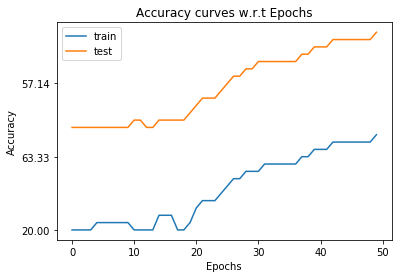

In [121]:
net = train_sgd(net, trainX_new, encoded_train_y, new_test_X, encoded_test_y, 0.001, act_foo, None, 50 )


In [122]:
net[-1].output_a.shape

(1, 10)

In [123]:
print(accuracy(net, trainX_new, encoded_train_y, act_foo) )
print(accuracy(net, new_test_X, encoded_test_y, act_foo) )
        

82.14
73.33


Avg Error in 1 epoch: 4.689063
Avg Error in 2 epoch: 4.664389
Avg Error in 3 epoch: 4.639893
Avg Error in 4 epoch: 4.615575
Avg Error in 5 epoch: 4.591437


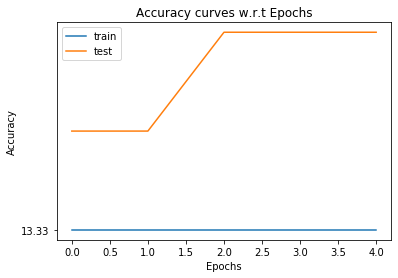

In [116]:
net = train_sgd(net, trainX_new, encoded_train_y, new_test_X, encoded_test_y, 0.0001, act_foo, None, 5 )


In [533]:
print(accuracy(net, trainX_new, encoded_train_y, act_foo) )
print(accuracy(net, new_test_X, encoded_test_y, act_foo) )


72.40
60.00


In [460]:
import pickle
with open("bestmodel", 'wb') as obj:
    pickle.dump(net7,obj)

In [74]:
import pickle
with open("bestmodel", 'rb') as obj:
    n_net = pickle.load(obj)

In [108]:
accuracy(n_net, trainX_new, encoded_train_y, act_foo)

(1, 10)


'75.00'

In [107]:
accuracy(n_net,  new_test_X, encoded_test_y, act_foo)

(1, 10)


'70.00'